In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import KMeans
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape; (662, 1000, 3)


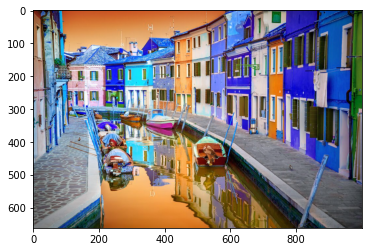

In [ ]:
image = cv2.imread('/content/drive/MyDrive/color detection/colorpic.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape; {}".format(image.shape))
plt.imshow(image)


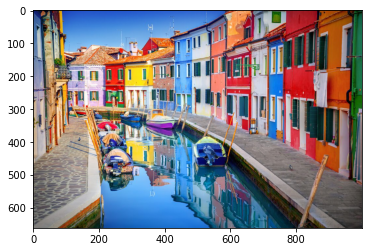

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

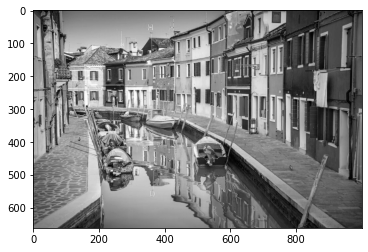

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')


In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize=(10,20))
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.title("Color Identification", fontsize=25)
        return rgb_colors

[array([226.03351988, 157.33036027,  85.80657573]),
 array([104.92527205,  98.96032068,  99.93398356]),
 array([ 46.01901125, 114.99248487, 197.00511841]),
 array([30.83857476, 54.53159877, 57.05993946]),
 array([207.55648345, 202.91090191, 204.05156392]),
 array([179.26526364,  53.54983811,  30.24125039]),
 array([157.60241053, 146.31483273, 146.39295191]),
 array([101.51054096, 167.55742112, 230.51544593])]

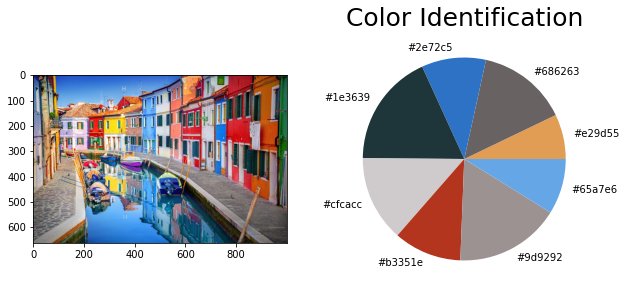

In [ ]:
image_Path='/content/drive/MyDrive/color detection/colorpic.jpg'
get_colors(get_image(image_Path), 8, True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
